In [1]:
import os
import h5py
import io
from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import display, clear_output
import pandas as pd
from numpy import linalg as LA
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

In [2]:
proj_dir = os.path.abspath('.')
controllers_dir =  os.path.join(proj_dir,'controllers')

In [4]:
# # for printing info purpose
# trial_idx = 3
# file_path = os.path.join(data_dir, f"{trial_idx:04}"+'.hdf5')
# h5_file = h5py.File(file_path, 'r')
# with h5_file as f: # load ith hdf5 file from list
#     frames = list(f['frames'])
#     for i, frame in enumerate(frames):
#         assert len(f['frames'][frame]['collisions']['impulses'][:]) == len(f['frames'][frame]['collisions']['object_ids'][:])
#         k = 0
#         for j, object_id_tuple in enumerate(f['frames'][frame]['collisions']['object_ids'][:]):
#             object_id_str = '-'.join([str(x) for x in object_id_tuple])
#             num_contacts = f['frames'][frame]['collisions']['num_contacts'][:][j]
#             if '1' not in object_id_str: # filter target zone
#                 print('frame: ', i)
#                 print('object ids: ', object_id_str)
#                 print('num contacts: ', f['frames'][frame]['collisions']['num_contacts'][:][j])
#                 print('impulses: ', f['frames'][frame]['collisions']['impulses'][:][j])
#                 print("contacts: ", f['frames'][frame]['collisions']['contacts'][:][k:k+num_contacts][:,-1])
#                 print("slice: ", f['frames'][frame]['collisions']['contacts'][:][k:k+num_contacts][:,-1][:,0])
#                 for m in range(num_contacts-1):
#                     assert (f['frames'][frame]['collisions']['contacts'][:][k:k+num_contacts][m][0] == f['frames'][frame]['collisions']['contacts'][:][k:k+num_contacts][m+1][0]).all()
#                 print('--------------------------------------------------------')
#             k += int(num_contacts)


In [3]:
# # for printing info purpose
# trial_idx = 43
# file_path = os.path.join(data_dir, f"{trial_idx:04}"+'.hdf5')
# h5_file = h5py.File(file_path, 'r')
# with h5_file as f: # load ith hdf5 file from list
#     frames = list(f['frames'])
# #     previous_collider_vel = 0
# #     previous_collidee_vel = 0
# #     previous_impulse = (0, 0, 0)
#     for i, frame in enumerate(frames):
# #         print(f['frames'][frame]['collisions']['object_ids'][:])
#         for j, object_id_tuple in enumerate(f['frames'][frame]['collisions']['object_ids'][:]):
#             object_id_str = '-'.join([str(x) for x in object_id_tuple])
#             if '3' in object_id_str:
#                 collidee_idx = [x for x in object_id_tuple if x != 3][0]
#                 impulse = f['frames'][frame]['collisions']['impulses'][:][j]
#                 relative_velocities = f['frames'][frame]['collisions']['relative_velocities'][:][j]
                
#                 collider_velocity = f['frames'][frame]['objects']['velocities'][:][2]
#                 collidee_velocity = f['frames'][frame]['objects']['velocities'][:][collidee_idx-1]
#                 delta_velocities = np.subtract(collidee_velocity, collider_velocity)
# #                 delta_collider_velocity = np.subtract(collider_velocity, previous_collider_vel)
# #                 delta_collidee_velocity = np.subtract(collidee_velocity, previous_collidee_vel)
#                 print('--------------------------------------------------------')
#                 print('frame: ', i)
#                 print('collider: 3')
#                 print('collidee: ', collidee_idx)
#                 print('impulses: ', impulse)
#                 print('delta_velocities: ', delta_velocities)
#                 print('relative velocities: ', relative_velocities)
#                 print('corr delta relative velocities', np.dot(delta_velocities, relative_velocities)/(np.linalg.norm(delta_velocities)*np.linalg.norm(relative_velocities)))
#                 print('corr impulse relative velocities: ', np.dot(impulse, relative_velocities)/(np.linalg.norm(impulse)*np.linalg.norm(relative_velocities)))
#                 print('corr impulse delta velocities: ', np.dot(impulse, delta_velocities)/(np.linalg.norm(impulse)*np.linalg.norm(delta_velocities)))
# #                 if not np.isnan(np.dot(impulse, relative_velocities)/(np.linalg.norm(impulse)*np.linalg.norm(relative_velocities))):
# #                     assert np.dot(delta_velocities, relative_velocities)/(np.linalg.norm(delta_velocities)*np.linalg.norm(relative_velocities))*np.dot(impulse, relative_velocities)/(np.linalg.norm(impulse)*np.linalg.norm(relative_velocities)) > 0
# #                 print('collider velocity: ', collider_velocity)
# #                 print('collidee velocity: ', collidee_velocity)
# #                 print('corr with collider: ', np.dot(impulse, collider_velocity))
# #                 print('corr with collidee: ', np.dot(impulse, collidee_velocity))
# #                 print('delta collider velocity: ', delta_collider_velocity)
# #                 print('delta collidee velocity: ', delta_collidee_velocity)
# #                 print('corr with delta collider: ', np.dot(previous_impulse, delta_collider_velocity))
# #                 print('corr with delta collidee: ', np.dot(previous_impulse, delta_collidee_velocity))
# #                 print(np.dot(impulse, delta_collider_velocity)>np.dot(impulse, delta_collidee_velocity))
# #                 previous_collider_vel = collider_velocity
# #                 previous_collidee_vel = collidee_velocity
# #                 previous_impulse = impulse


trial:  0


<IPython.core.display.Javascript object>


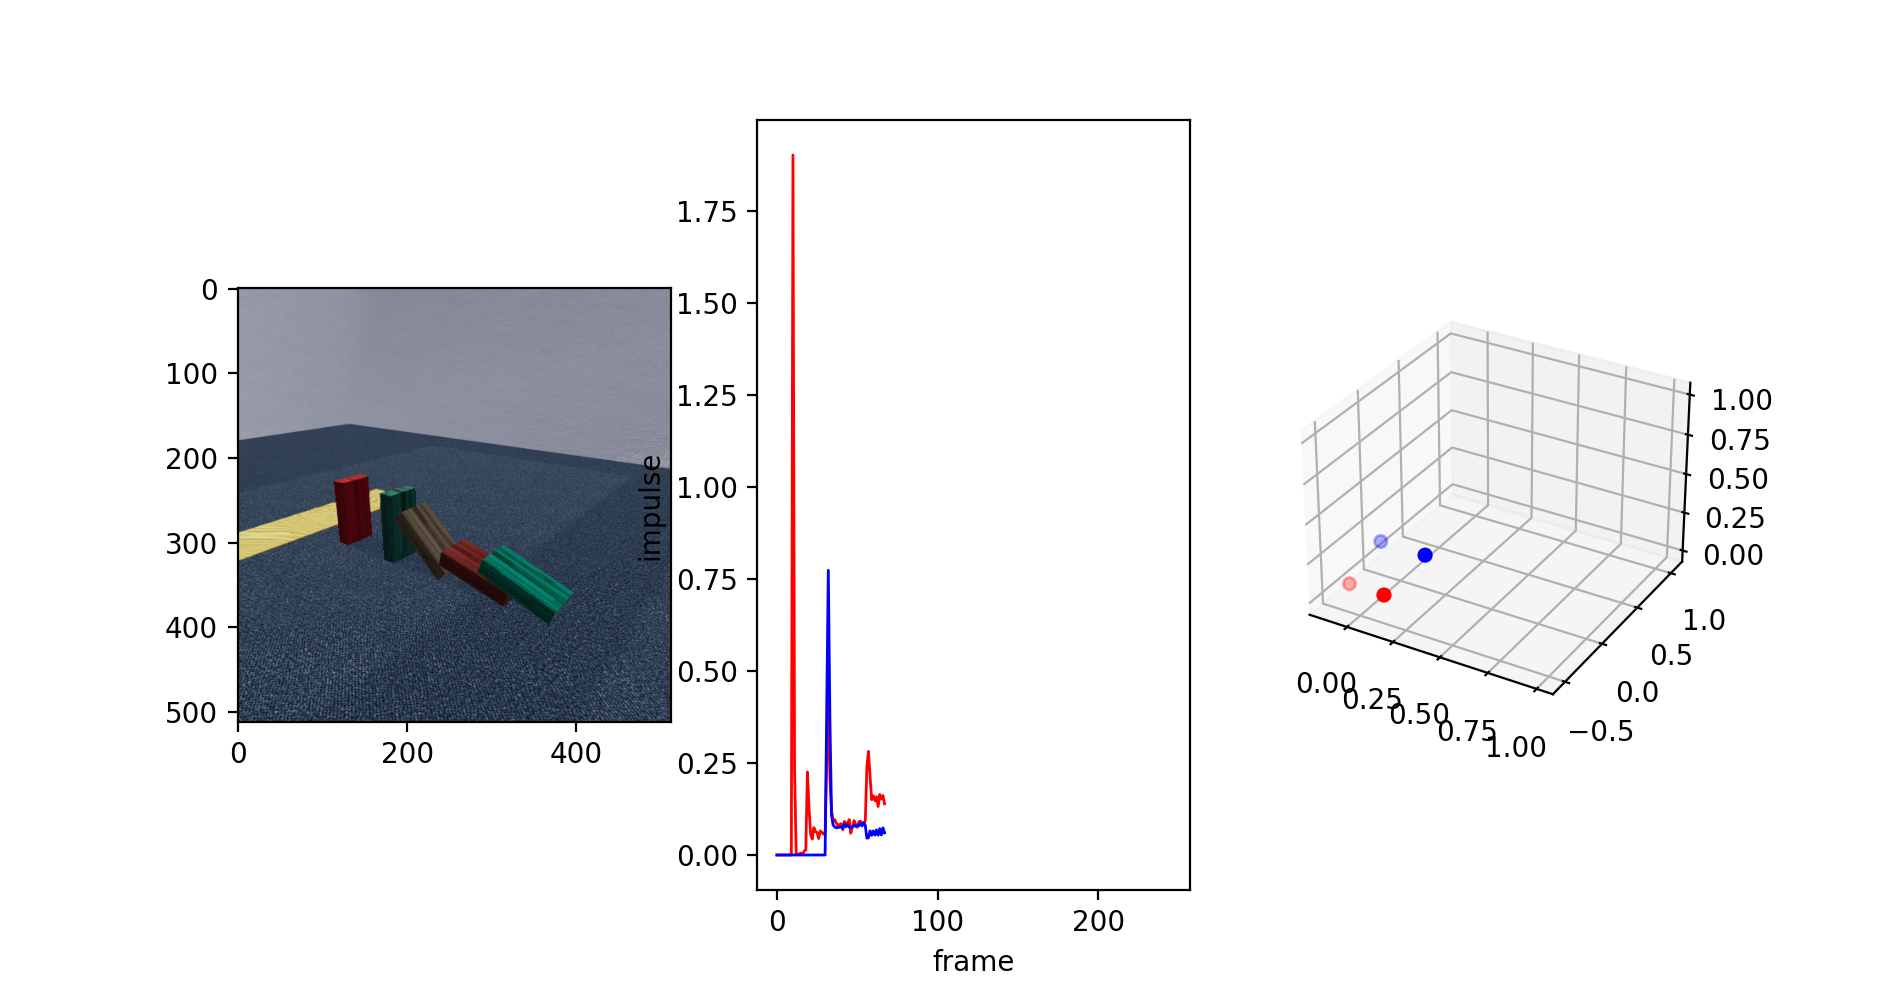

[[<matplotlib.lines.Line2D object at 0x122e6b430>, <matplotlib.image.AxesImage object at 0x12673a350>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x123af2470>], [<matplotlib.lines.Line2D object at 0x122e6bcd0>, <matplotlib.image.AxesImage object at 0x122e6b490>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x122e6ba30>], [<matplotlib.lines.Line2D object at 0x122ddc550>, <matplotlib.image.AxesImage object at 0x122e6bd00>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x122ddc2b0>], [<matplotlib.lines.Line2D object at 0x122ddcd30>, <matplotlib.image.AxesImage object at 0x122e6a8c0>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x122ddca90>], [<matplotlib.lines.Line2D object at 0x122ddd5a0>, <matplotlib.image.AxesImage object at 0x122ddcd60>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x122ddd300>], [<matplotlib.lines.Line2D object at 0x122ddde10>, <matplotlib.image.AxesImage object at 0x122ddd5d0>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x122dddb70>], [<matplotlib.lines.Line2D o

In [61]:
# make dynamic figures: 3 panels
%matplotlib notebook

num_trial = 1
colors = ['red', 'blue', 'green', 'orange']
                 
for trial_idx in range(0, num_trial):
    print('trial: ', trial_idx)
    file_path = os.path.join(data_dir, f"{trial_idx:04}"+'.hdf5')
    h5_file = h5py.File(file_path, 'r')
    
    fig = plt.figure(figsize=(9.5,5))
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.set_xlabel("frame")
    ax2.set_ylabel("impulse")
    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    
    ims = []
    with h5_file as f:
        frames = list(f['frames'])
        collisions = {}
        for j, frame in enumerate(frames):
            im = ax1.imshow(Image.open(io.BytesIO(f['frames'][frame]['images']['_img'][()])))
            k = 0
            placeholder = ax3.plot([],[],[])
            for object_id_tuple, impulse, num_contacts in zip(f['frames'][frame]['collisions']['object_ids'][:], f['frames'][frame]['collisions']['impulses'][:], f['frames'][frame]['collisions']['num_contacts'][:]):
                object_id_str = '-'.join([str(x) for x in object_id_tuple])
                if '1' not in object_id_str: # filter target zone
                    if object_id_str not in collisions.keys():
                        collisions[object_id_str] = {'start_idx':j, 'color':colors[len(collisions)], 'impulse_norm': [LA.norm(impulse)]}
                    else:
                        collisions[object_id_str]['impulse_norm'].append(LA.norm(impulse))
                    pts = f['frames'][frame]['collisions']['contacts'][:][k:k+num_contacts][:,-1]
                    placeholder.append(ax3.scatter(pts[:,2], pts[:,0], pts[:,1], c=collisions[object_id_str]['color']))
                k += int(num_contacts)

            # plotting starts here
            line = ax2.plot([], [])
            timepoints = [ind for ind in range(j+1)]
            for coll in collisions.values():
                datapoints = [0 for ind in range(coll['start_idx'])]+coll['impulse_norm']
                if len(datapoints) != len(timepoints):
                    assert len(timepoints)>len(datapoints)
                    datapoints += [0 for _ in range(len(timepoints)-len(datapoints))]
                line.append(ax2.plot(timepoints, datapoints, color=coll['color'], linewidth=1)[0])
            line.append(im)
            ims.append(line+placeholder)
    print(ims)
    if collisions:
        ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
#         ani.save(data_dir+'/movie_'+str(trial_idx)+'.gif', writer='imagemagick', fps=30)
        print('finish!')

In [ ]:
# # make dynamic figures: 2 panels (img+contact point)
# %matplotlib notebook

# num_trial = 100
# colors = ['red', 'blue', 'green', 'orange']
                 
# for trial_idx in range(0, num_trial):
#     print('trial: ', trial_idx)
#     file_path = os.path.join(data_dir, f"{trial_idx:04}"+'.hdf5')
#     h5_file = h5py.File(file_path, 'r')

#     fig = plt.figure(figsize=(9.5,5))
#     ax1 = fig.add_subplot(1, 2, 1)
#     ax2 = fig.add_subplot(1, 2, 2, projection='3d')

#     ims = []
#     with h5_file as f:
#         frames = list(f['frames'])
#         contacts = {}
#         for frame in frames:
#             k = 0
#             placeholder = ax2.plot([],[],[])
#             for object_id_tuple, num_contacts in zip(f['frames'][frame]['collisions']['object_ids'][:], f['frames'][frame]['collisions']['num_contacts'][:]):
#                 object_id_str = '-'.join([str(x) for x in object_id_tuple])
#                 if '1' not in object_id_str: # filter target zone
#                     if object_id_str not in contacts.keys():
#                         contacts[object_id_str] = {'color':colors[len(contacts)]}
#                     pts = f['frames'][frame]['collisions']['contacts'][:][k:k+num_contacts][:,-1]
#                     placeholder.append(ax2.scatter(pts[:,2], pts[:,0], pts[:,1], c=contacts[object_id_str]['color']))
#                 k += int(num_contacts)
#             im = ax1.imshow(Image.open(io.BytesIO(f['frames'][frame]['images']['_img'][()])))
#             placeholder.append(im)
#             ims.append(placeholder)
#     if contacts:
#         ani = animation.ArtistAnimation(fig, ims, interval=10, blit=True, repeat_delay=10)
#         ani.save(data_dir+'/movie_'+str(trial_idx)+'.gif', writer='imagemagick', fps=30)
#         print("finish")

In [6]:
# for printing info purpose
# num_trial = 100
                        
# for trial_idx in range(0, num_trial):
#     print('trial: ', trial_idx)
#     file_path = os.path.join(data_dir, f"{trial_idx:04}"+'.hdf5')
#     h5_file = h5py.File(file_path, 'r')
#     with h5_file as f: # load ith hdf5 file from list
#         model_names = f['static']['model_names'][()]
#         middle_objects =  f['static']['middle_objects'][()]
#         object_ids =  f['static']['object_ids'][()]
#         probe_id = f['static']['probe_id'][()]
#         target_id = f['static']['target_id'][()]
#         zone_id = f['static']['zone_id'][()]
#         print('object_ids: ', object_ids, '\n', 'probe_id: ', probe_id, '\n', 'target_id: ', target_id, '\n', 'zone_id: ', zone_id, '\n', 'model_names: ', model_names, '\n', 'middle_objects: ', middle_objects)
#         frames = list(f['frames'])
#         for i, frame in enumerate(frames):
#             for object_id_tuple in f['frames'][frame]['collisions']['object_ids'][:]:
#                 object_id_str = '-'.join([str(x) for x in object_id_tuple])
#                 if '1' in object_id_str: # filter target zone
#                     continue
#                 else:
#                     print(i)
#                     print('num contacts: ', f['frames'][frame]['collisions']['num_contacts'][:])
#                     print('contacts: ', f['frames'][frame]['collisions']['contacts'][:])
#                     print('impulses: ', f['frames'][frame]['collisions']['impulses'][:])
                    
            
#             contacts = f['frames'][frame]['collisions']['contacts'][:]
#             print(contacts)
#             object_ids = f['frames'][frame]['collisions']['object_ids'][:]
#             print(object_ids)
#             relative_velocities = f['frames'][frame]['collisions']['relative_velocities'][:]
#             print(relative_velocities)
#             states = f['frames'][frame]['collisions']['states'][:]
#             print(states)
#             impulses = f['frames'][frame]['collisions']['impulses'][:][0]
#             print(impulses)
#             velocities = f['frames'][frame]['objects']['velocities'][:]
#             print(velocities)
        

In [5]:
# # for printing info purpose
# trial_idx = 14
# file_path = os.path.join(data_dir, f"{trial_idx:04}"+'.hdf5')
# h5_file = h5py.File(file_path, 'r')
# with h5_file as f: # load ith hdf5 file from list
#     model_names = f['static']['model_names'][()]
#     middle_objects =  f['static']['middle_objects'][()]
#     object_ids =  f['static']['object_ids'][()]
#     probe_id = f['static']['probe_id'][()]
#     target_id = f['static']['target_id'][()]
#     zone_id = f['static']['zone_id'][()]
#     print('object_ids: ', object_ids, '\n', 'probe_id: ', probe_id, '\n', 'target_id: ', target_id, '\n', 'zone_id: ', zone_id, '\n', 'model_names: ', model_names, '\n', 'middle_objects: ', middle_objects)
#     frames = list(f['frames'])
#     for i, frame in enumerate(frames):
#         velocities = f['frames'][frame]['objects']['velocities'][:][2]
#         print(velocities)


trial:  0


MovieWriter imagemagick unavailable; using Pillow instead.


finish!
trial:  1


MovieWriter imagemagick unavailable; using Pillow instead.


finish!
trial:  2


MovieWriter imagemagick unavailable; using Pillow instead.


finish!
trial:  3


KeyboardInterrupt: 

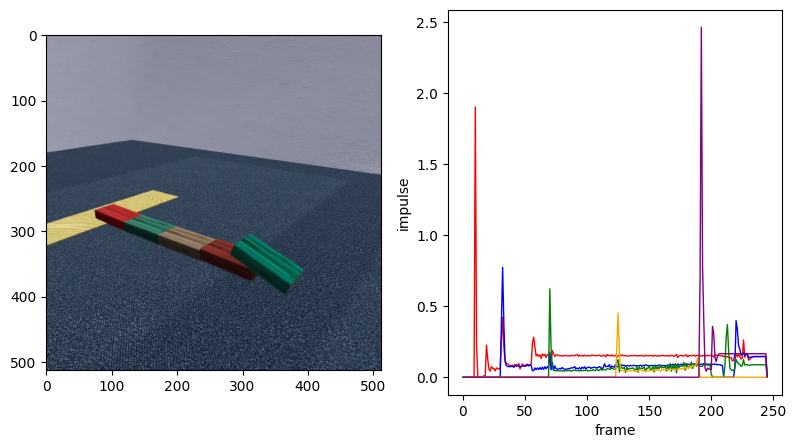

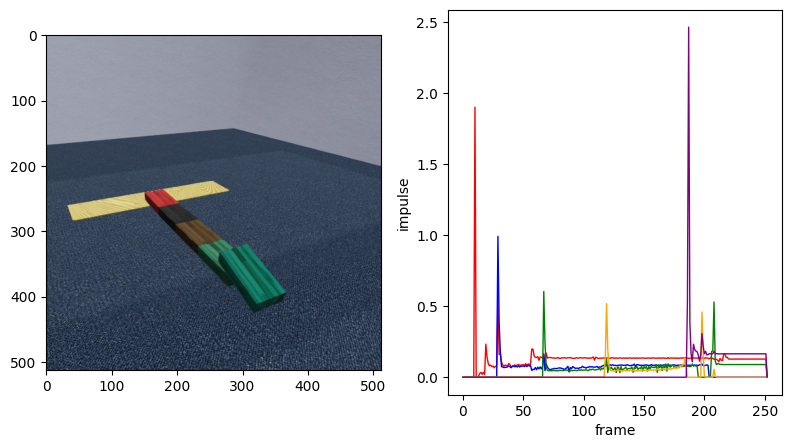

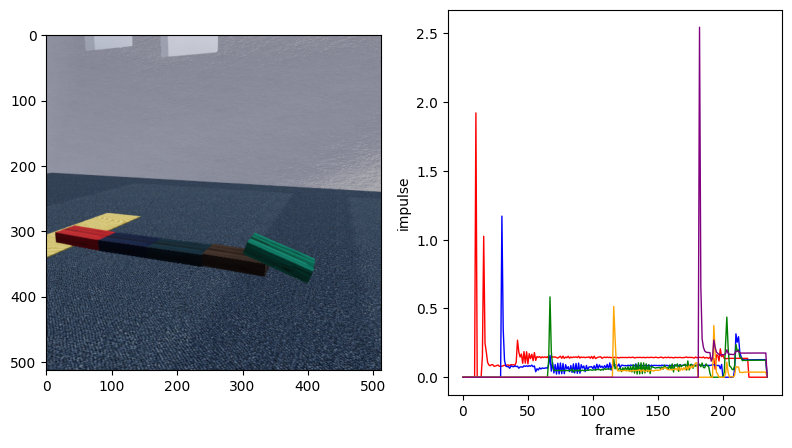

Error in callback <function flush_figures at 0x1217edbd0> (for post_execute):



KeyboardInterrupt



In [8]:
# make dynamic figures: 2 panels (img+impulse norm)
# %matplotlib notebook

num_trial = 11
colors = ['red', 'blue', 'green', 'orange', 'purple']
                 
for trial_idx in range(0, num_trial):
    print('trial: ', trial_idx)
    file_path = os.path.join(data_dir, f"{trial_idx:04}"+'.hdf5')
    h5_file = h5py.File(file_path, 'r')
    
    fig = plt.figure(figsize=(9.5,5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_xlabel("frame")
    ax2.set_ylabel("impulse")
    
    ims = []
    with h5_file as f:
        frames = list(f['frames'])
        collisions = {}
        for j, frame in enumerate(frames):
            im = ax1.imshow(Image.open(io.BytesIO(f['frames'][frame]['images']['_img'][()])))
            for i, object_id_tuple in enumerate(f['frames'][frame]['collisions']['object_ids'][:]):
                object_id_str = '-'.join([str(x) for x in object_id_tuple])

                impulse = f['frames'][frame]['collisions']['impulses'][:][i]
                state = f['frames'][frame]['collisions']['states'][:][i]
                if object_id_str not in collisions.keys():
                    collisions[object_id_str] = {'start_idx':j, 'color':colors[len(collisions)], 'impulse_vec':[impulse], 'impulse_norm': [LA.norm(impulse)], 'state': [state]}
                else:
                    collisions[object_id_str]['impulse_vec'].append(impulse)
                    collisions[object_id_str]['impulse_norm'].append(LA.norm(impulse))
                    collisions[object_id_str]['state'].append(state)

            # plotting starts here
            line = ax2.plot([], [])
            timepoints = [ind for ind in range(j+1)]
            for coll in collisions.values():
                datapoints = [0 for ind in range(coll['start_idx'])]+coll['impulse_norm']
                if len(datapoints) != len(timepoints):
                    assert len(timepoints)>len(datapoints)
                    datapoints += [0 for _ in range(len(timepoints)-len(datapoints))]
                line.append(ax2.plot(timepoints, datapoints, color=coll['color'], linewidth=1)[0])
            line.append(im)
            ims.append(line)
    if collisions:
        ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
        ani.save(data_dir+'/ani_'+str(trial_idx)+'.gif', writer='imagemagick', fps=30)
        print('finish!')

In [18]:
# specify object
obj_idx = [2,1]
obj_color = {'3-4': 'r', '4-5': 'b', '5-6': 'green', '2-6': 'orange', '1-2': 'purple', '4-3': 'r', '5-4': 'b', '6-5': 'green', '6-2': 'orange', '2-1': 'purple'}
num_trial = 15

# read ref file:
ref_dir =  os.path.join(controllers_dir,'tmp_ref')
data_dir =  os.path.join(controllers_dir,'tmp_l')
# data_dir =  os.path.join(controllers_dir,'tmp_h')

trial_idx:  0
trial_idx:  1
trial_idx:  2
trial_idx:  3
trial_idx:  4
trial_idx:  5
trial_idx:  6
trial_idx:  7
trial_idx:  8
trial_idx:  9
trial_idx:  10
trial_idx:  11
trial_idx:  12
trial_idx:  13
trial_idx:  14
magnitude finished!


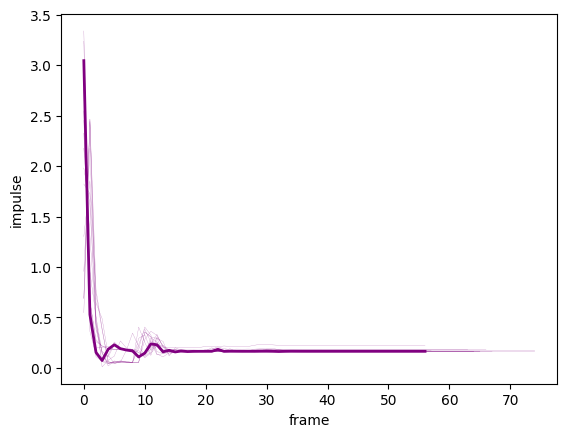

In [19]:
# make static figure: compare ref and noise magnitud

# init figure
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_xlabel("frame")
ax1.set_ylabel("impulse")

file_path = os.path.join(ref_dir, f"{0:04}"+'.hdf5')
h5_file = h5py.File(file_path, 'r')

collisions_ref = {}
with h5_file as f:
    frames = list(f['frames'])
    for j, frame in enumerate(frames):
        for i, object_id_tuple in enumerate(f['frames'][frame]['collisions']['object_ids'][:]):
            if set(obj_idx) == set(object_id_tuple):
                object_id_str = '-'.join([str(x) for x in object_id_tuple])
                impulse = f['frames'][frame]['collisions']['impulses'][:][i]
                if object_id_str not in collisions_ref.keys():
                    collisions_ref[object_id_str] = {'impulse_norm': [LA.norm(impulse)]}
                else:
                    collisions_ref[object_id_str]['impulse_norm'].append(LA.norm(impulse))

for key, value in collisions_ref.items():
    ax1.plot(value['impulse_norm'], color=obj_color[object_id_str], linewidth=2)

# read noisy file:
for trial_idx in range(0, num_trial):
    print("trial_idx: ", trial_idx)
    file_path = os.path.join(data_dir, f"{trial_idx:04}"+'.hdf5')
    h5_file = h5py.File(file_path, 'r')
    with h5_file as f:
        frames = list(f['frames'])
        collisions = {}
        for j, frame in enumerate(frames):
            for i, object_id_tuple in enumerate(f['frames'][frame]['collisions']['object_ids'][:]):
                if set(obj_idx) == set(object_id_tuple):
                    object_id_str = '-'.join([str(x) for x in object_id_tuple])
                    impulse = f['frames'][frame]['collisions']['impulses'][:][i]
                    if object_id_str not in collisions.keys():
                        collisions[object_id_str] = {'impulse_norm': [LA.norm(impulse)]}
                    else:
                        collisions[object_id_str]['impulse_norm'].append(LA.norm(impulse))

        for key, value in collisions.items():
            ax1.plot(value['impulse_norm'], color=obj_color[object_id_str], linewidth=0.2, alpha=0.5)
fig.savefig(data_dir+'/magnitude_'+object_id_str+'.png')
print("magnitude finished!")
# plt.show()

In [10]:
def plot_3d_scatter(data,ax=None,colour='red',sz=30,el=20,az=50,sph=True,sph_colour="gray",sph_alpha=0.001,
                    eq_line=True,pol_line=True,grd=False):
    ax.view_init(el, az)
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    ax.set_zlim(-1.5,1.5)

    # Add a shaded unit sphere
    if sph:
        u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:30j]
        x = np.cos(u)*np.sin(v)
        y = np.sin(u)*np.sin(v)
        z = np.cos(v)
        ax.plot_surface(x, y, z, color=sph_colour,alpha=sph_alpha)

    # Add an equitorial line
    if eq_line:
        # t = theta, p = phi
        eqt = np.linspace(0,2*np.pi,50,endpoint=False)
        eqp = np.linspace(0,2*np.pi,50,endpoint=False)
        eqx = 2*np.sin(eqt)*np.cos(eqp)
        eqy = 2*np.sin(eqt)*np.sin(eqp) - 1
        eqz = np.zeros(50)

        # Equator line
        ax.plot(eqx,eqy,eqz,color="k",lw=1)

    # Add a polar line
    if pol_line:
        # t = theta, p = phi
        eqt = np.linspace(0,2*np.pi,50,endpoint=False)
        eqp = np.linspace(0,2*np.pi,50,endpoint=False)
        eqx = 2*np.sin(eqt)*np.cos(eqp)
        eqy = 2*np.sin(eqt)*np.sin(eqp) - 1
        eqz = np.zeros(50)

        # Polar line
        ax.plot(eqx,eqz,eqy,color="k",lw=1)

    # Draw a centre point
    ax.scatter([0], [0], [0], color="k", s=sz)    

    # Turn off grid
    ax.grid(grd)

    # Ticks
    ax.set_xticks([-1,0,1])
    ax.set_yticks([-1,0,1])
    ax.set_zticks([-1,0,1])
    
    return ax.scatter(data[:,0],data[:,1],data[:,2],s=1,c=colour)


def plot_arrow(point,ax,colour="red"):
    # Fancy arrow 
    a = Arrow3D([0, point[0]], [0, point[1]], [0, point[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color=colour)
    return ax.add_artist(a)


# Drawing a fancy vector see Ref. [7] 
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

<IPython.core.display.Javascript object>


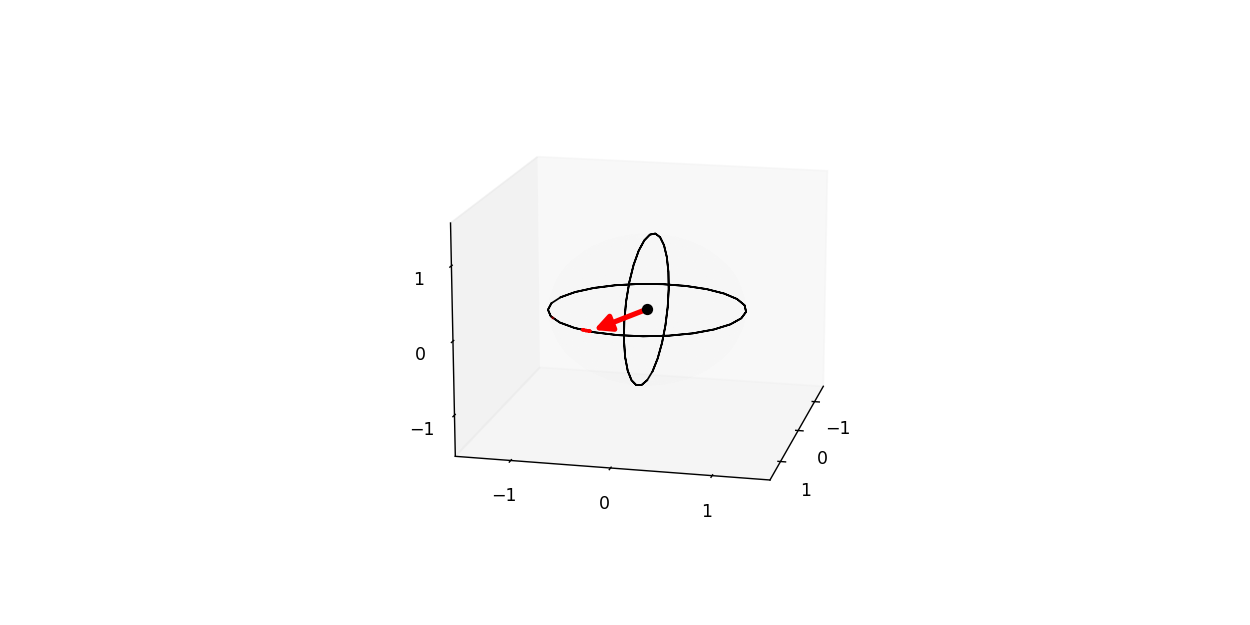

reference file is:  E:\tdw_physics_kevin\tdw_physics\noisy\controllers\tmp_ref\0000.hdf5
reading trial:  0
reading trial:  1
reading trial:  2
reading trial:  3
reading trial:  4
reading trial:  5
reading trial:  6
reading trial:  7
reading trial:  8
reading trial:  9
reading trial:  10
reading trial:  11
reading trial:  12
reading trial:  13
reading trial:  14


In [27]:
# make static figure: compare ref and noise direction
%matplotlib notebook

# specify object
obj_idx = [3,4]
obj_color = {'3-4': 'r', '4-5': 'b', '5-6': 'green', '2-6': 'orange', '1-2': 'purple', '4-3': 'r', '5-4': 'b', '6-5': 'green', '6-2': 'orange', '2-1': 'purple'}
num_trial = 15

# read ref file:
ref_dir =  os.path.join(controllers_dir,'tmp_ref')
# data_dir =  os.path.join(controllers_dir,'tmp_l')
data_dir =  os.path.join(controllers_dir,'tmp_l')

test_frame = 10
fs = 16

# init figure
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
img = []

file_path = os.path.join(ref_dir, f"{0:04}"+'.hdf5')
h5_file = h5py.File(file_path, 'r')
print('reference file is: ', file_path)

collisions_ref = []
with h5_file as f:
    frames = list(f['frames'])
    for j, frame in enumerate(frames):
        for i, object_id_tuple in enumerate(f['frames'][frame]['collisions']['object_ids'][:]):
            if set(obj_idx) == set(object_id_tuple):
                impulse = f['frames'][frame]['collisions']['impulses'][:][i]
                if np.array_equal(impulse,(0,0,0)):
                    collisions_ref.append((0,0,0))
                else:
                    collisions_ref.append(impulse/np.linalg.norm(impulse))
                
# read noisy file:
collisions = {}
for trial_index in range(0, num_trial):
    print("reading trial: ", trial_index)
    file_path = os.path.join(data_dir, f"{trial_index:04}"+'.hdf5')
    h5_file = h5py.File(file_path, 'r')
    with h5_file as f:
        frames = list(f['frames'])
        for j, frame in enumerate(frames):
            if j < len(collisions_ref):
                for i, object_id_tuple in enumerate(f['frames'][frame]['collisions']['object_ids'][:]):
                    if set(obj_idx) == set(object_id_tuple):
                        object_id_str = '-'.join([str(x) for x in object_id_tuple])
                        impulse = f['frames'][frame]['collisions']['impulses'][:][i]
                        if str(trial_index) not in collisions.keys():
                            collisions[str(trial_index)] = []
                        else:
                            if np.array_equal(impulse, (0,0,0)):
                                collisions[str(trial_index)].append((0,0,0))
                            else:
                                if np.dot(impulse, collisions_ref[j]) < 0:
                                    impulse = np.negative(impulse)
                                collisions[str(trial_index)].append(impulse/np.linalg.norm(impulse))

all_lengths = [len(x) for x in collisions.values()]
all_lengths.append(len(collisions_ref))
# print(all_lengths)
length = min(all_lengths)
# print("length: ", length)

for frame_idx in range(length):
    if frame_idx == test_frame:
#         print(frame_idx+1, '/', length)
        impulse = collisions_ref[frame_idx]
        noisy_impulse = np.array([x[frame_idx] for x in collisions.values()])
#         print(impulse)
#         print(noisy_impulse)
        plot_arrow(impulse,ax1,colour=obj_color[object_id_str])
        plot_3d_scatter(noisy_impulse, ax1, colour=obj_color[object_id_str],sph_alpha=0.002)
        plt.show()
#         img.append([plot_arrow(impulse,ax1,colour=obj_color[object_id_str]), plot_3d_scatter(noisy_impulse, ax1, colour=obj_color[object_id_str])])
        break
    
# # Labels
# ax1.set_xlabel('x',fontsize=fs)
# ax1.set_ylabel('y',fontsize=fs)
# ax1.set_zlabel('z',fontsize=fs)

# print('saving!')
# ani = animation.ArtistAnimation(fig, img, interval=50, blit=True, repeat=True, repeat_delay=1000)
# ani.save('/Users/cogtoolslab/Desktop/haha.gif', writer='pillow', fps=10, ,dpi=1000)
# print('finished')

<IPython.core.display.Javascript object>


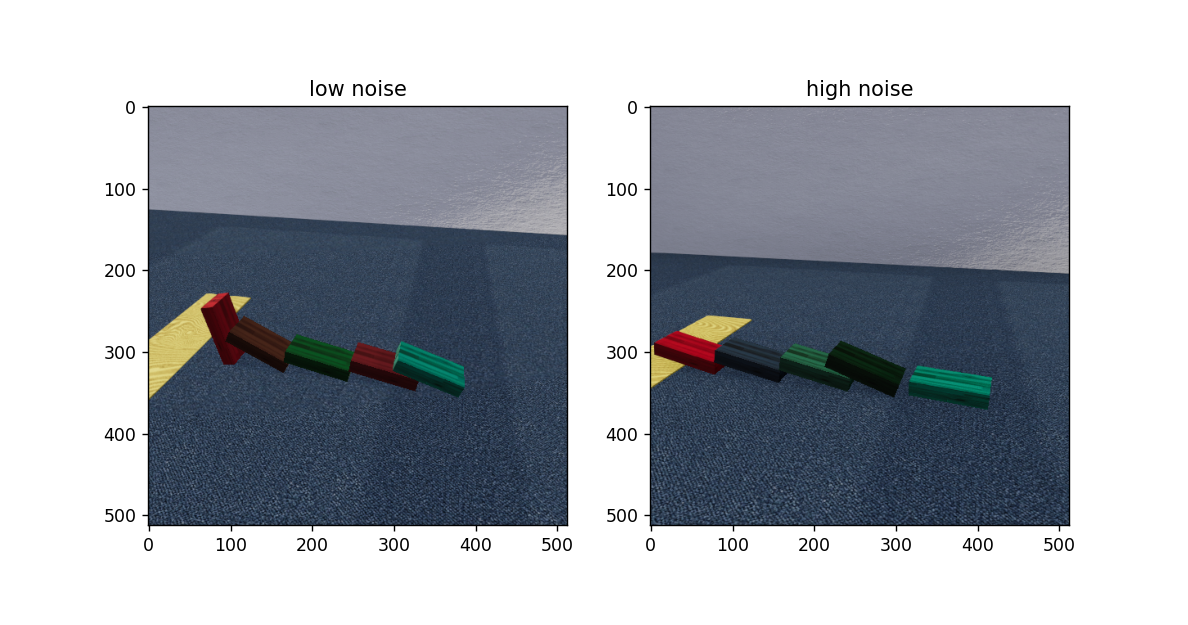

finish


In [32]:
# make dynamic figures: 2 panels high and low video
%matplotlib notebook

trial_idx_l = 2
trial_idx_h = 1
data_dir_l = os.path.join(controllers_dir,'tmp_ref')
data_dir_h = os.path.join(controllers_dir,'tmp_h_100')

file_path_l = os.path.join(data_dir_l, f"{trial_idx_l:04}"+'.hdf5')
h5_file_l = h5py.File(file_path_l, 'r')
file_path_h = os.path.join(data_dir_h, f"{trial_idx_h:04}"+'.hdf5')
h5_file_h = h5py.File(file_path_h, 'r')

fig = plt.figure(figsize=(9.5,5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("low noise")
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("high noise")

ims = []
with h5_file_l as f:
    frames = list(f['frames'])
    for i, frame in enumerate(frames):
        if i<210:
            im_l = ax1.imshow(Image.open(io.BytesIO(f['frames'][frame]['images']['_img'][()])))
            ims.append([im_l])
        
with h5_file_h as f:
    frames = list(f['frames'])
    for i, frame in enumerate(frames):
        im_h = ax2.imshow(Image.open(io.BytesIO(f['frames'][frame]['images']['_img'][()])))
        ims[i].append(im_h)
        
ani = animation.ArtistAnimation(fig, ims, interval=10, blit=True, repeat_delay=10)
# plt.show()
ani.save(data_dir_l+'/movie.gif', writer='pillow', fps=30)
print("finish")

In [28]:
# specify objects
obj_idxs = [[3,4], [4,5], [5,6], [2,6], [1,2]]
obj_color = {'3-4': 'r', '4-5': 'b', '5-6': 'green', '2-6': 'orange', '1-2': 'purple', '4-3': 'r', '5-4': 'b', '6-5': 'green', '6-2': 'orange', '2-1': 'purple'}
num_trial = 20

# read ref file:
ref_dir =  os.path.join(controllers_dir,'tmp_ref')
# data_dirs = [os.path.join(controllers_dir,'tmp_l'), os.path.join(controllers_dir,'tmp_h')]
data_dirs = [os.path.join(controllers_dir,'tmp_h')]

fs = 16

[3, 4]
E:\tdw_physics_kevin\tdw_physics\noisy\controllers\tmp_h


<IPython.core.display.Javascript object>


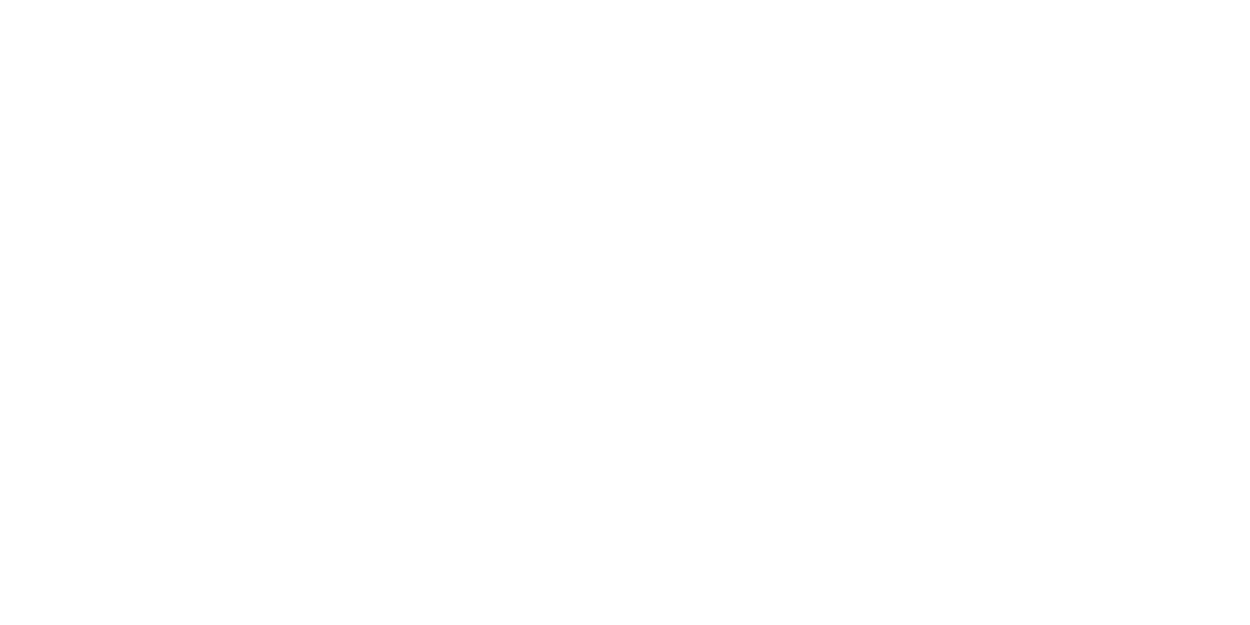

saving direction!
Saving frame 0 of None
Saving frame 1 of None
Saving frame 2 of None
Saving frame 3 of None
Saving frame 4 of None
Saving frame 5 of None
Saving frame 6 of None
Saving frame 7 of None
Saving frame 8 of None


KeyboardInterrupt: 

In [33]:
# make dynamic figure: compare ref and noise magnitude and direction

for obj_idx in obj_idxs:
    print(obj_idx)
    for data_dir in data_dirs:
        print(data_dir)
#         # init figure
#         fig = plt.figure()
#         ax1 = fig.add_subplot(1, 1, 1)
#         ax1.set_xlabel("frame")
#         ax1.set_ylabel("impulse")

#         file_path = os.path.join(ref_dir, f"{0:04}"+'.hdf5')
#         h5_file = h5py.File(file_path, 'r')

#         collisions_ref = {}
#         with h5_file as f:
#             frames = list(f['frames'])
#             for j, frame in enumerate(frames):
#                 for i, object_id_tuple in enumerate(f['frames'][frame]['collisions']['object_ids'][:]):
#                     if set(obj_idx) == set(object_id_tuple):
#                         object_id_str = '-'.join([str(x) for x in object_id_tuple])
#                         impulse = f['frames'][frame]['collisions']['impulses'][:][i]
#                         if object_id_str not in collisions_ref.keys():
#                             collisions_ref[object_id_str] = {'impulse_norm': [LA.norm(impulse)]}
#                         else:
#                             collisions_ref[object_id_str]['impulse_norm'].append(LA.norm(impulse))

#         for key, value in collisions_ref.items():
#             ax1.plot(value['impulse_norm'], color=obj_color[object_id_str], linewidth=2)

#         # read noisy file:
#         for trial_idx in range(0, num_trial):
#             file_path = os.path.join(data_dir, f"{trial_idx:04}"+'.hdf5')
#             h5_file = h5py.File(file_path, 'r')
#             with h5_file as f:
#                 frames = list(f['frames'])
#                 collisions = {}
#                 for j, frame in enumerate(frames):
#                     for i, object_id_tuple in enumerate(f['frames'][frame]['collisions']['object_ids'][:]):
#                         if set(obj_idx) == set(object_id_tuple):
#                             object_id_str = '-'.join([str(x) for x in object_id_tuple])
#                             impulse = f['frames'][frame]['collisions']['impulses'][:][i]
#                             if object_id_str not in collisions.keys():
#                                 collisions[object_id_str] = {'impulse_norm': [LA.norm(impulse)]}
#                             else:
#                                 collisions[object_id_str]['impulse_norm'].append(LA.norm(impulse))

#                 for key, value in collisions.items():
#                     ax1.plot(value['impulse_norm'], color=obj_color[object_id_str], linewidth=0.2, alpha=0.3)
#         fig.savefig(data_dir+'/magnitude_'+object_id_str+'.png')
#         print("magnitude finished!")



        # init figure
        fig = plt.figure(figsize=(10, 5))
        ax1 = fig.add_subplot(1, 1, 1, projection='3d')
        img = []

        file_path = os.path.join(ref_dir, f"{0:04}"+'.hdf5')
        h5_file = h5py.File(file_path, 'r')

        collisions_ref = []
        with h5_file as f:
            frames = list(f['frames'])
            for j, frame in enumerate(frames):
                for i, object_id_tuple in enumerate(f['frames'][frame]['collisions']['object_ids'][:]):
                    if set(obj_idx) == set(object_id_tuple):
                        impulse = f['frames'][frame]['collisions']['impulses'][:][i]
                        if np.array_equal(impulse,(0,0,0)):
                            collisions_ref.append((0,0,0))
                        else:
                            collisions_ref.append(impulse/np.linalg.norm(impulse))

        # read noisy file:
        collisions = {}
        for trial_index in range(0, num_trial):
            file_path = os.path.join(data_dir, f"{trial_index:04}"+'.hdf5')
            h5_file = h5py.File(file_path, 'r')
            with h5_file as f:
                frames = list(f['frames'])
                for j, frame in enumerate(frames):
                    if j < len(collisions_ref):
                        for i, object_id_tuple in enumerate(f['frames'][frame]['collisions']['object_ids'][:]):
                            if set(obj_idx) == set(object_id_tuple):
                                object_id_str = '-'.join([str(x) for x in object_id_tuple])
                                impulse = f['frames'][frame]['collisions']['impulses'][:][i]
                                if str(trial_index) not in collisions.keys():
                                    collisions[str(trial_index)] = []
                                else:
                                    if np.array_equal(impulse, (0,0,0)):
                                        collisions[str(trial_index)].append((0,0,0))
                                    else:
                                        if np.dot(impulse, collisions_ref[j]) < 0:
                                            impulse = np.negative(impulse)
                                        collisions[str(trial_index)].append(impulse/np.linalg.norm(impulse))

        all_lengths = [len(x) for x in collisions.values()]
        all_lengths.append(len(collisions_ref))
        length = min(all_lengths)

        for frame_idx in range(length):
            impulse = collisions_ref[frame_idx]
            noisy_impulse = np.array([x[frame_idx] for x in collisions.values()])
            img.append([plot_arrow(impulse,ax1,colour=obj_color[object_id_str]), plot_3d_scatter(noisy_impulse, ax1, colour=obj_color[object_id_str], sph_alpha=0.001)])

        # Labels
        ax1.set_xlabel('x',fontsize=fs)
        ax1.set_ylabel('y',fontsize=fs)
        ax1.set_zlabel('z',fontsize=fs)

        print('saving direction!')
        ani = animation.ArtistAnimation(fig, img, interval=50, blit=True, repeat=True, repeat_delay=1000)
        ani.save(data_dir+'/direction_'+object_id_str+'.gif', writer='pillow', fps=10, dpi=300, progress_callback = lambda i, n: print(f'Saving frame {i} of {n}'))
        print('direction finished!')
